# Laoratorio 4

### Integrantes:
- Valenina Alaniz, CI: 5.209.018-4
 - Facundo Diaz, CI: 5.053.849-3
  - Lucio Rodriguez, CI: 5.404.316-1

## Introducción

En este laboratorio nos proponemos utilizar redes neuronales FF sobre el dataset Fashion MNIST. Este dataset consiste en 60.000 imagenes monocromáticas de prendas de ropa y accesorios, cada una de 28x28 píxeles etiquetadas en una de 10 categorías.

En el desarrollo del informe se plantean distintas arquitecturas, que son evaluadas utilizando el método de optimicación de hiperparamentros "grid search" con el fin de optimizar algunos hiperparámetros (tasa de aprendizaje y tamaño de lote).


### Preprocesamiento

Dado que el conjunto de datos a utilizar se encuentra pre-dividido en subconjuntos de entrenamiento y de pruebas, nos encargaremos de extraer del conjunto de entrenamiento 20% de instancias para generar un conjunto de validación. Para mantener la integridad de los datos (las clases del conjunto están balanceadas sin necesidad de nuestra intervención) se usa la función `StratifiedShuffleSplit` de la librería scikit-learn para que esta división mantenga la proporción de elementos de cada clase adecuadamente.

El conjunto de pruebas consta de 10.000 instancias cada uno, mientras que el conjunto de entrenamiento está compuesto por 60.000 de ellas antes de ser dividido en 48.000 para entrenamiento y otras 12.000 para validación.

Debido a que la red neuronal toma como entrada un vector debemos transformar la imagen de entrada (matrtiz de 28x28) a un vector, para esto se utliza la función `flatten`.

Finalmente, se normaliza el conjunto de imágenes dividiendo el valor numérico de cada píxel entre 255, de logrando que los datos utilizados durante el problema tomen valores dentro del conjunto [0,1]. Esto ayuda a evitar problemas de inestabilidad numérica. Este enfoque busca mejorar la convergencia del modelo.

**Nota**: con complejidad de una red se quiere representar el tamaño de la misma, lo que se puede "medir" en función de los pesos de los atributos del modelo y/o la cantidad total de atributos con pesos distintos de cero. Es decir una red neuronal con mayor cantidad de atributos con pesos o pesos con mayor magnitud se considera más compleja que una que no cumpla no anterior.
Esta definición es relevante a la hora de implementar métodos de regularización.

**Los cuatro archivos del conjunto de datos se deben agregar en la carpeta dataset para la correcta ejecución del Notebook**

In [12]:
import utils
import parte_a
import parte_b
import parte_c
from torch import nn

# Sirve para que antes de ejecutar una celda recargue los imports, asegurandonos de tener la última versión de los módulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Red 1

En primer lugar, se implementa una red compuesta por una única capa oculta de 32 neuronas, utilizando una función de activación sigmoide y CrossEntropy como función de perdida. Esta función de perdida es elegida debido a que la misma tiene el objetivo de medir adecuadamente el rendimiento de un modelo de clasificación cuya salida es una distribución de probabilidades. En particular la entropía cruzada es una medida que compara dos distribuciones de probabilidad y cuantifica la diferencia entre ellas. El entrenamiento se realiza con una tasa de aprendizaje de 0.01.

A su vez, se emplea descenso por gradiente estocástico en el cual aproxima el valor del gradiente mediante la información brindada por la aplicación del modelo en entrenamiento sobre un único ejemplo del conjunto de datos.

A partir de este modelo base se llega a resultados de hasta 87% de accuracy en el conjunto de validación. Se generan pruebas sobre este modelo inicial para verificar si los hiperparámetros elegidos son los más adecuados para el problema.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.3382, Training Accuracy: 82.9646, Validation Loss: 0.4798, Validation Accuracy: 82.5167
Epoch 2/10, Loss: 0.1894, Training Accuracy: 85.3833, Validation Loss: 0.4167, Validation Accuracy: 84.8667
Epoch 3/10, Loss: 0.0001, Training Accuracy: 86.6875, Validation Loss: 0.3988, Validation Accuracy: 85.3833
Epoch 4/10, Loss: 0.3622, Training Accuracy: 87.3417, Validation Loss: 0.3849, Validation Accuracy: 86.1167
Epoch 5/10, Loss: 0.0048, Training Accuracy: 87.7771, Validation Loss: 0.3751, Validation Accuracy: 86.6667
Epoch 6/10, Loss: 0.0522, Training Accuracy: 87.0187, Validation Loss: 0.3935, Validation Accuracy: 85.6917
Epoch 7/10, Loss: 0.0369, Training Accuracy: 87.7604, Validation Loss: 0.3856, Validation Accuracy: 86.1417
Epoch 8/10, Loss: 0.0936, Training Accuracy: 88.5312, Validation Loss: 0.3730, Validation Accuracy: 86.6833
Epoch 9/10, Loss: 0.0009, Training Accuracy: 88.8771, Validation Loss: 0.3601, Validation Accuracy: 86.9167
Epoch 10/10, Loss: 0.0355, T

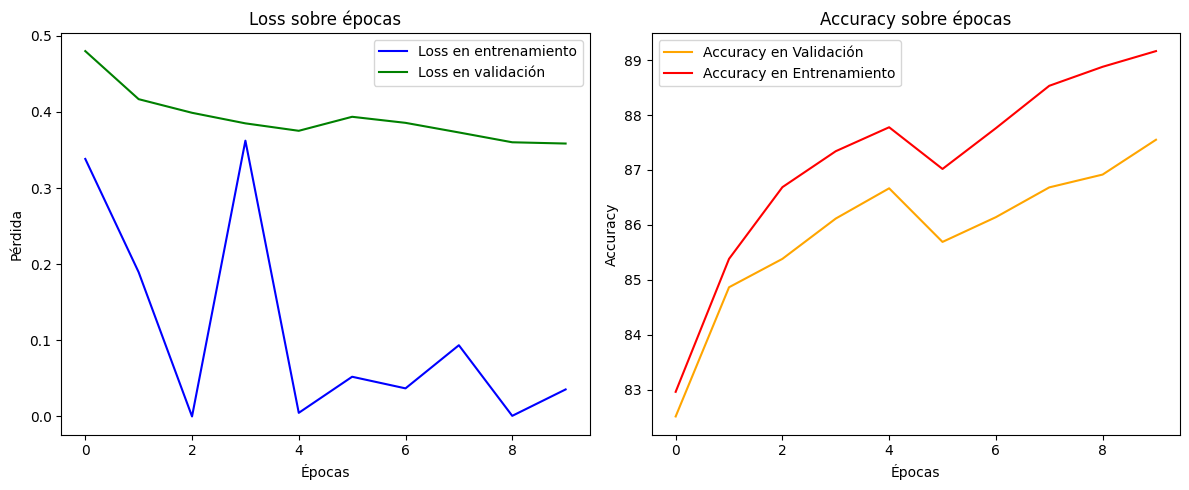

Cargando: 100%|██████████| 1/1 [04:28<00:00, 268.45s/it]


In [13]:
model1 = utils.test_model(parte_a.Red1, nn.CrossEntropyLoss(), 10, [1], False, [0.01])

### Red 1 - Tamaño de Lote
Se entrena la red con distintos tamaños de lote y se grafica la accuracy en el conjunto de validación y entrenamiento en función de la cantidad de épocas. Se observa que a medida que aumenta el tamaño del lote, la accuracy en el conjunto de validación disminuye si se evalúa en una cantidad baja de épocas. Esto puede deberse a que el aumento del lote provoca que la cantidad de actualizaciones de los pesos de la red por época disminuya, lo que hace que el entrenamiento sea más lento. Se entiende que el tamaño del batch es un hiperparámetro importante que afecta el desempeño de la red.

Se observa que el rendimiento es mejor con un batch size de 1, lo que indica que la red se beneficia de actualizaciones más frecuentes de los pesos, lo que puede estar fuertemente ligado con la cantidad de épocas y la tasa de aprendizaje.

Al ejecutar pocas épocas es conveniente actualizar la información en todas las oportunidades posibles, a su vez la tasa de aprendizaje (el "paso" realizado por descenso por gradiente) debe tener una magnitud suficiente para acercarse al mínimo de la función de perdida en pocas iteraciones, se deduce que tasas de aprendizajes bajas deben ir acompañadas de un mayor número de épocas para lograr un rendimiento adecuado.

Cargando: 100%|██████████| 10/10 [06:20<00:00, 15.93s/it]

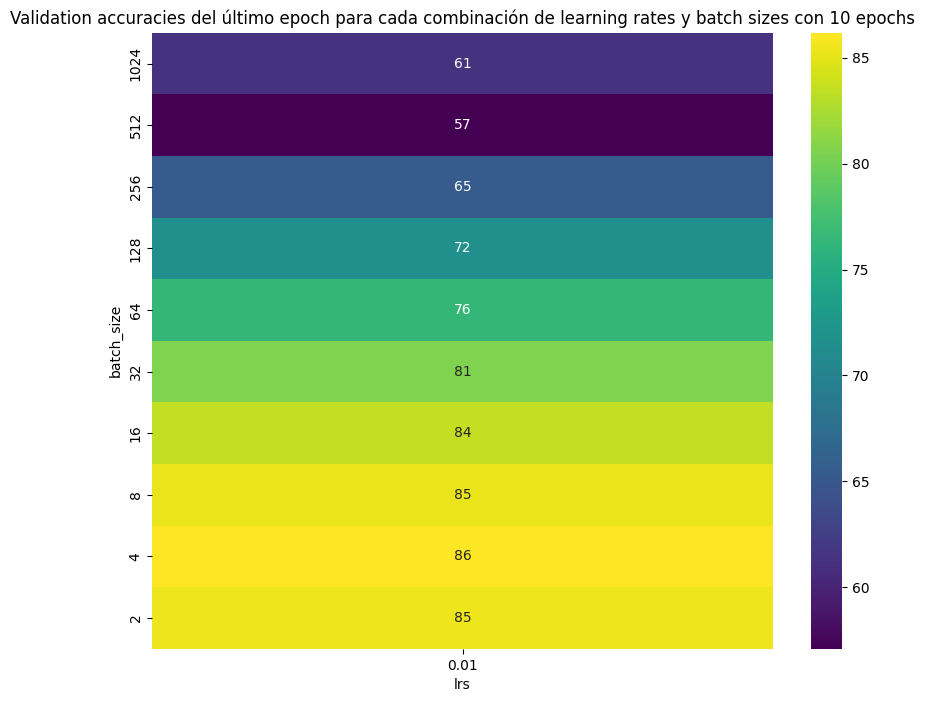

Cargando: 100%|██████████| 10/10 [06:20<00:00, 38.04s/it]


In [14]:
model1_b = utils.test_model(parte_a.Red1, nn.CrossEntropyLoss(), 10,[2,4, 8, 16, 32, 64, 128, 256, 512, 1024], False, [0.01], False)

### Red 1 - Número de épocas
Se toma de la ejecución anterior el tamaño del batch donde la red tuvo mejor rendimiento. Se aumenta el número de épocas para determinar si la red tiene la complejidad suficiente como para lograr un rendimiento adecuado o si, en cambio, el rendimiento está siendo limitado por un número de épocas reducido.

Los resultados muestran que existe un aumento considerable de la accuracy en el conjunto de entrenamiento, no sucede lo mismo en el conjunto de validación. Esto indica que la cantidad de épocas está permitiendo que el modelo memorice el conjunto de entrenamiento casi por completo, pero no logra generalizar lo suficiente como para lograr un buen rendimiento en el conjunto de validación. Lo anterior refleja un sobreajuste al conjunto de entrenamiento.

Por lo anterior se propone aumentar la complejidad de la red cambiando su arquitectura para verificar si la limitante es la arquitectura.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.0021, Training Accuracy: 83.2854, Validation Loss: 0.4711, Validation Accuracy: 82.9417
Epoch 2/150, Loss: 0.0075, Training Accuracy: 85.7333, Validation Loss: 0.4158, Validation Accuracy: 85.1750
Epoch 3/150, Loss: 7.1874, Training Accuracy: 86.7500, Validation Loss: 0.3937, Validation Accuracy: 85.7750
Epoch 4/150, Loss: 0.1675, Training Accuracy: 87.2396, Validation Loss: 0.3866, Validation Accuracy: 86.2917
Epoch 5/150, Loss: 0.0008, Training Accuracy: 86.6125, Validation Loss: 0.4029, Validation Accuracy: 85.6583
Epoch 6/150, Loss: 0.0001, Training Accuracy: 88.2083, Validation Loss: 0.3689, Validation Accuracy: 86.9833
Epoch 7/150, Loss: 0.0234, Training Accuracy: 87.6229, Validation Loss: 0.3865, Validation Accuracy: 86.4417
Epoch 8/150, Loss: 0.1849, Training Accuracy: 88.5104, Validation Loss: 0.3614, Validation Accuracy: 87.0750
Epoch 9/150, Loss: 0.0018, Training Accuracy: 88.9833, Validation Loss: 0.3578, Validation Accuracy: 87.3500
Epoch 10/150, Loss:

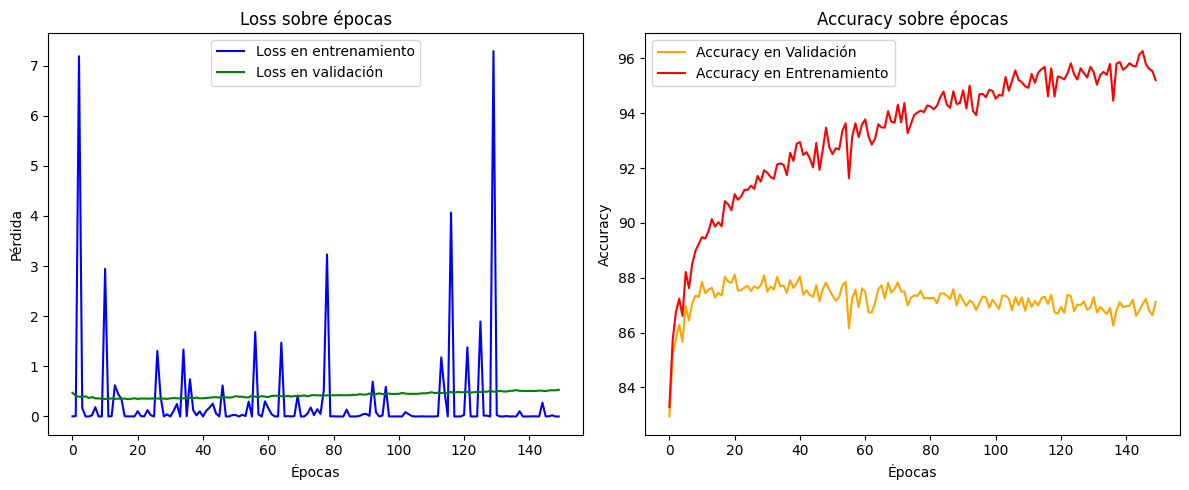

Cargando: 100%|██████████| 1/1 [1:00:03<00:00, 3603.62s/it]


In [15]:
model1_e = utils.test_model(parte_a.Red1, nn.CrossEntropyLoss(), 150, [1], False, [0.01])

## Pruebas con distintas arquiteturas
La arquitectura planteada contiene una única capa oculta, esto puede estar limitando la capacidad del modelo para resolver de forma efectiva el problema (algunos problemas son incluso imposibles de resolver utilizando arquitecturas de una capa oculta [Sontag 1992]). Considerando esto se realizan pruebas con distintas arquitecturas para determinar si la limitante es la complejidad de la red.

Se proponen múltiples arquitecturas de redes en las que se varía la cantidad de capas ocultas y neuronas por capa, en particular, se proponen tanto redes poco profundas con mayor cantidad de neuronas por capa como, redes con distintos niveles de profundidad.
Junto a lo anterior se analiza el comportamiento de la perdida en función de las épocas tanto en el conjunto de entrenamiento como el de validación, de la misma forma se generan gráficas mostrando la accuracy, estos datos nos indicarán si la red esta sobreajustando o no.

Pruebas con distintas (Sigmoide, SELU, ReLU y LeakyReLU) funciones de activación fueron realizadas sobre las redes presentadas a continuación, sin embargo, no se obtuvieron resultados satisfactorios, por lo que se optó por utilizar la función de activación ReLU en todas las redes.

**Nota**:
Si una arquitectura es apropiada para la resolución del problema, al entrenar con un conjunto reducido debería sobreajustar muy rápido, mientras que si la arquitectura es inadecuada debería tardar más en sobreajustar. Por lo tanto, posteriormente se realizarán pruebas reduciendo el conjunto de entrenamiento para verificar si la arquitectura es adecuada o no.
Este proceso también fue utilizado para generar una evaluación rápida de las arquitecturas propuestas durante el proceso de selección.

## Red 2 - Tamaños de lote
Un primer acercamiento al aumento de la complejidad es aumentar la cantidad de neuronas de la capa oculta, dado que la Red 1 tiene una única capa oculta con 32 neuronas, se propone aumentar la cantidad de neuronas a 512 con el objetivo de comprobar si el rendimiento de la red se está viendo limitado por su complejidad.
 Se observa que la accuracy en el conjunto de validación llega a un 89%, lo que indica que la red es capaz de detectar patrones más complejos en las imágenes de entrenamiento. El aumento de la complejidad dio mejores resultados en términos de accuracy del conjunto de validación, *teniendo un mejor rendimiento la Red 2 en 10 épocas que la Red 1 en 150*.

Cargando: 100%|██████████| 27/27 [25:52<00:00, 28.30s/it]  

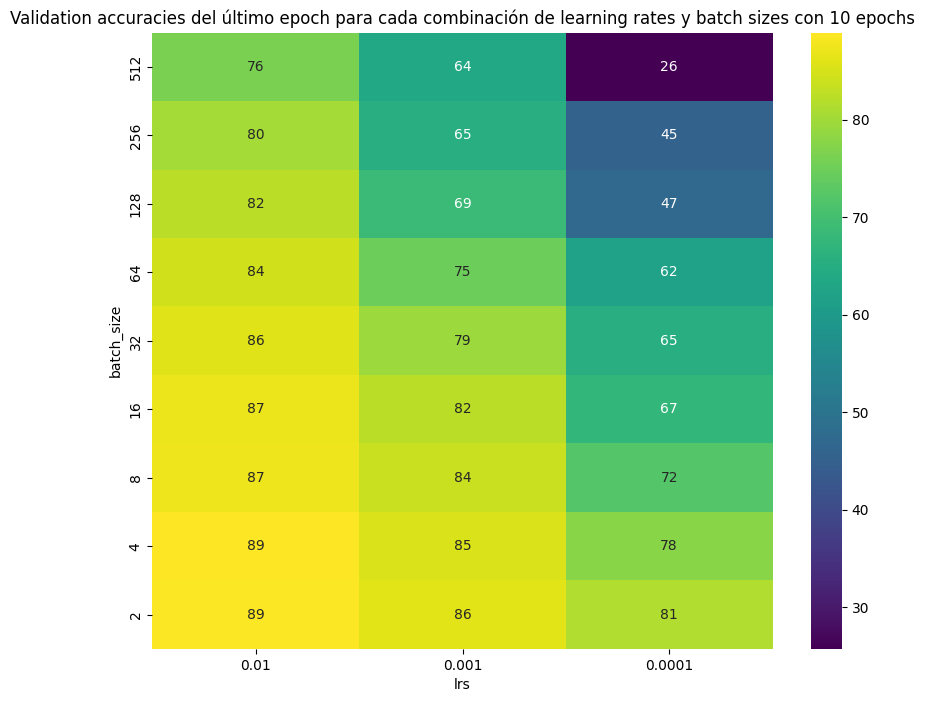

Cargando: 100%|██████████| 27/27 [25:52<00:00, 57.51s/it]


In [16]:
model2 = utils.test_model(parte_b.Red2, nn.CrossEntropyLoss(), 10, [2, 4, 8, 16, 32, 64, 128, 256, 512], False, [0.01, 0.001, 0.0001], False)

## Red 2 - Número de épocas
Se entrena la Red 2 con una mayor cantidad de épocas mantenimiento el tamaño de lote y la tasa de aprendizajes funcionaron mejor en la parte anterior.
A su vez, se observa que la perdida en el conjunto de validación es mayor que en el conjunto de entrenamiento, lo que indica que la red esta sobreajustando, esto es una consecuencia esperable al ejecutar una red neuronal de mayor durante una cantidad elevada de épocas, en la parte (c) se utilizarán mecanismos de regularización para disminuir la presencia de sobreajuste.

Vale destacar que aunque la red experimente un claro sobreajuste en términos de perdida, lo mismo no se refleja en la magnitud esperada sobre la accuracy en el conjunto de validación, que se mantiene aproximadamente constante en un 89%.


Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.0239, Training Accuracy: 84.3104, Validation Loss: 0.4541, Validation Accuracy: 83.8750
Epoch 2/150, Loss: 0.0725, Training Accuracy: 85.1396, Validation Loss: 0.4308, Validation Accuracy: 84.4667
Epoch 3/150, Loss: 0.2534, Training Accuracy: 86.5958, Validation Loss: 0.3974, Validation Accuracy: 85.4000
Epoch 4/150, Loss: 0.8723, Training Accuracy: 88.7104, Validation Loss: 0.3505, Validation Accuracy: 87.6750
Epoch 5/150, Loss: 0.0110, Training Accuracy: 88.3417, Validation Loss: 0.3695, Validation Accuracy: 87.0833
Epoch 6/150, Loss: 0.0194, Training Accuracy: 88.8646, Validation Loss: 0.3501, Validation Accuracy: 87.4500
Epoch 7/150, Loss: 0.1190, Training Accuracy: 89.7708, Validation Loss: 0.3268, Validation Accuracy: 88.2750
Epoch 8/150, Loss: 0.5730, Training Accuracy: 89.9146, Validation Loss: 0.3343, Validation Accuracy: 88.0667
Epoch 9/150, Loss: 0.1498, Training Accuracy: 90.7479, Validation Loss: 0.3166, Validation Accuracy: 88.8417
Epoch 10/150, Loss:

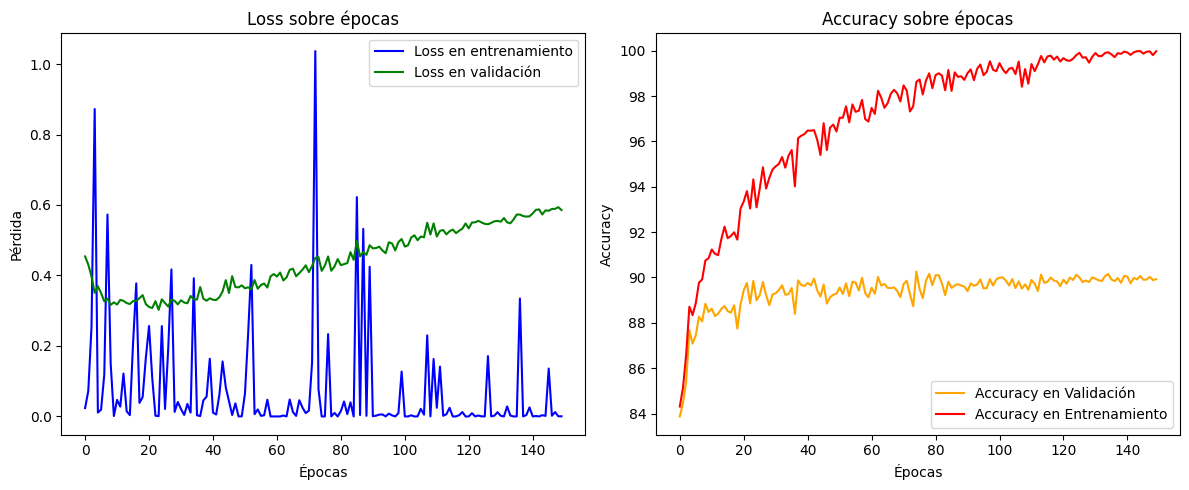

Cargando: 100%|██████████| 1/1 [27:05<00:00, 1625.72s/it]


In [17]:
model2_e = utils.test_model(parte_b.Red2, nn.CrossEntropyLoss(), 150, [4], False, [0.01])

## Red 2 - Prueba con un conjunto reducido
Se comprueba que la cantidad de iteraciones necesarias para generar sobreajuste entrenando sobre un conjunto reducido de datos es menor que entrenando sobre el conjunto completo. Esto indica que la arquitectura se acerca a ser adecuada para la resolución del problema.
Se puede observar un soreajuste mucho mayor en contraparte al conjunto de entrenamiento con todos los ejemplos, al aumentar las épocas se observa que la perdida se mantiene constante en 1, mientras que la del conjunto de entrenamiento disminuye.
Lo mismo sucede con la accuracy, en el mejor caso la red logra un 52.7% de accuracy en el conjunto de validación, mientras que en el conjunto de entrenamiento en algunos casos llega a un 100%.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/100, Loss: 2.1499, Training Accuracy: 20.0000, Validation Loss: 2.2395, Validation Accuracy: 13.7000
Epoch 2/100, Loss: 2.2820, Training Accuracy: 34.0000, Validation Loss: 2.1811, Validation Accuracy: 19.1417
Epoch 3/100, Loss: 2.1366, Training Accuracy: 46.0000, Validation Loss: 2.1266, Validation Accuracy: 24.6167
Epoch 4/100, Loss: 2.0381, Training Accuracy: 46.0000, Validation Loss: 2.0743, Validation Accuracy: 27.3333
Epoch 5/100, Loss: 1.9218, Training Accuracy: 42.0000, Validation Loss: 2.0242, Validation Accuracy: 25.5583
Epoch 6/100, Loss: 1.8971, Training Accuracy: 58.0000, Validation Loss: 1.9693, Validation Accuracy: 33.0167
Epoch 7/100, Loss: 1.7259, Training Accuracy: 60.0000, Validation Loss: 1.9107, Validation Accuracy: 37.9500
Epoch 8/100, Loss: 1.7081, Training Accuracy: 62.0000, Validation Loss: 1.8559, Validation Accuracy: 40.3583
Epoch 9/100, Loss: 1.4861, Training Accuracy: 62.0000, Validation Loss: 1.8084, Validation Accuracy: 41.2250
Epoch 10/100, Loss:

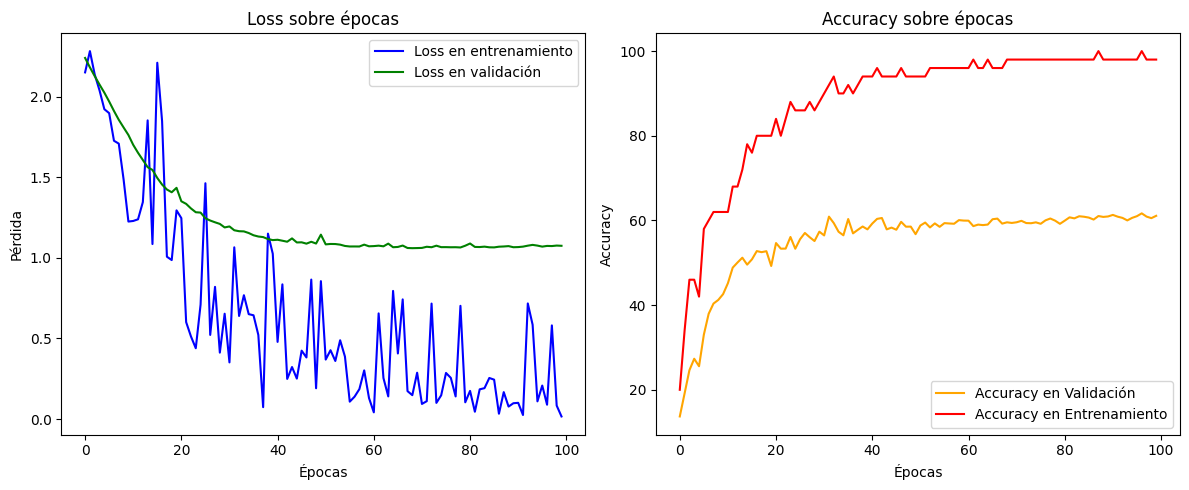

Cargando: 100%|██████████| 1/1 [01:27<00:00, 87.54s/it]


In [34]:
model_cr = utils.test_model(parte_b.Red2, nn.CrossEntropyLoss(), 100, [4], True, [0.01])

## Red 3 - Tamaño de Lote

Se continúa complejizando la red con el fin de que sea capaz de detectar otros patrones en las imágenes del conjunto de entrenamiento, para hacerlo se le agrega una capa oculta con 256 neuronas.
Como se puede ver en el siguiente mapa de calor, se logra una mejora con respecto al modelo anterior que cuenta con una única capa oculta de 512 neuronas. Se puede observar que si bien no se tiene una mejora significativa en términos de accuracy en el conjunto de validación, se logran mejores resultados en una mayor cantidad de combinaciones de hiperparámetros. Esto puede indicar que aumentar el tamaño de la red disminuye su sensibilidad a los hiperparámetros, lo que demuestra que la Red 3 tiene más capacidad de generalización.

Cargando: 100%|██████████| 28/28 [39:32<00:00, 49.45s/it]  

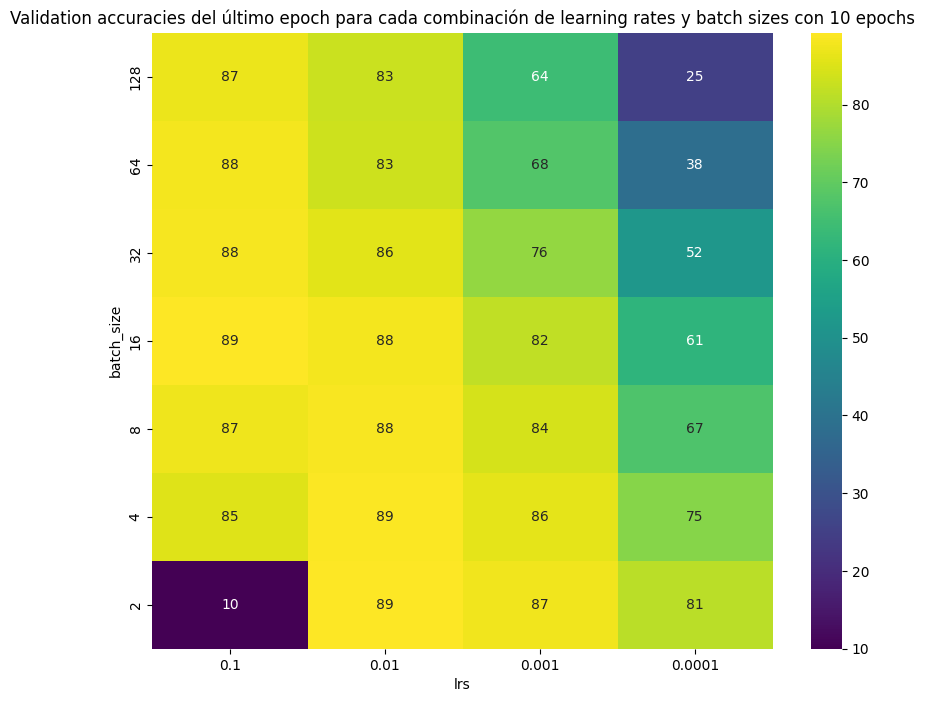

Cargando: 100%|██████████| 28/28 [39:32<00:00, 84.74s/it]


In [18]:
model3_b = utils.test_model(parte_b.Red3, nn.CrossEntropyLoss(), 10, [2, 4, 8, 16, 32, 64, 128], False, [0.1, 0.01, 0.001, 0.0001], False)

## Red 3 - Número de épocas
Se busca mejorar el rendimiento modificando la arquitectura de la red. Se aumenta la complejidad de la red agregando una capa oculta de 256 neuronas con respecto a la red anterior, este enfoque aumenta la accuracy del modelo en el conjunto de validación hasta un 90.5%.

Se observa que si bien el modelo con menor perdida en el conjunto de validación es el entrenado con menos de 30 épocas, el modelo que genera mejor accuracy en el mismo conjunto es el entrenado con más de 120 épocas.
Esto puede deberse a que el modelo está clasificando con un nivel de confianza muy alto, por ejemplo:
Si el modelo clasifica como la clase 1 a una instancia con un 99% de confianza y se equivoca en la clasificación, se aumenta la pérdida. En cambio, si el modelo clasifica como la clase 1 a una instancia con un 51% de confianza y se equivoca en la clasificación, se aumenta la pérdida en menor medida. Si bien estas dos situaciones tienen el mismo resultado en términos de clasificación, el comportamiento de la perdida es muy distinta.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.5925, Training Accuracy: 82.8667, Validation Loss: 0.4977, Validation Accuracy: 82.0417
Epoch 2/150, Loss: 0.2358, Training Accuracy: 86.4292, Validation Loss: 0.3967, Validation Accuracy: 85.4500
Epoch 3/150, Loss: 0.6221, Training Accuracy: 83.8063, Validation Loss: 0.4577, Validation Accuracy: 82.4750
Epoch 4/150, Loss: 0.2913, Training Accuracy: 88.1896, Validation Loss: 0.3604, Validation Accuracy: 87.3000
Epoch 5/150, Loss: 0.4982, Training Accuracy: 89.1208, Validation Loss: 0.3456, Validation Accuracy: 87.4833
Epoch 6/150, Loss: 0.2819, Training Accuracy: 89.7542, Validation Loss: 0.3282, Validation Accuracy: 88.4083
Epoch 7/150, Loss: 0.1707, Training Accuracy: 89.9292, Validation Loss: 0.3336, Validation Accuracy: 87.9250
Epoch 8/150, Loss: 0.2934, Training Accuracy: 90.4813, Validation Loss: 0.3225, Validation Accuracy: 88.2833
Epoch 9/150, Loss: 0.2047, Training Accuracy: 90.6917, Validation Loss: 0.3333, Validation Accuracy: 88.2333
Epoch 10/150, Loss:

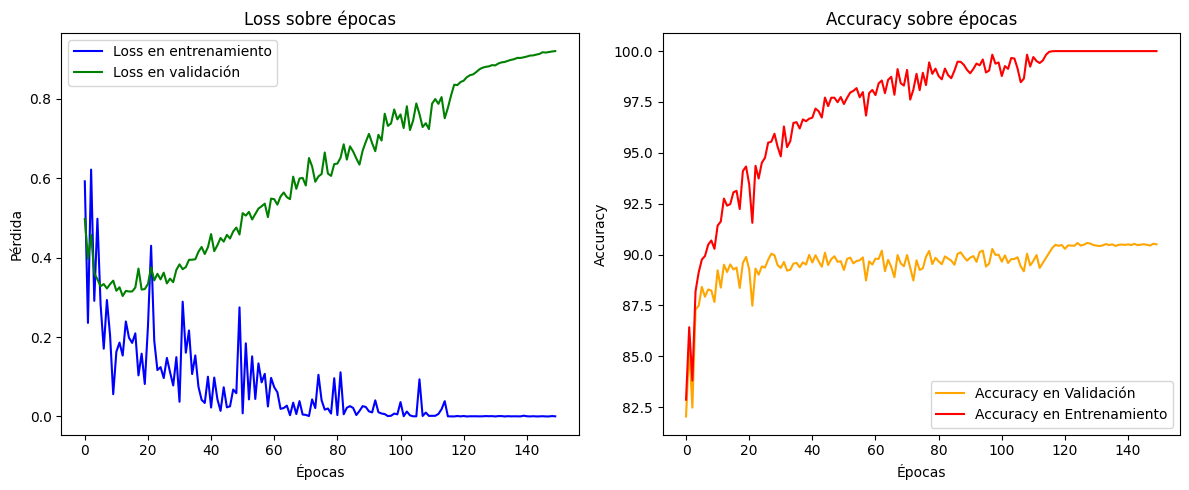

Cargando: 100%|██████████| 1/1 [09:38<00:00, 578.64s/it]


In [19]:
model3_e = utils.test_model(parte_b.Red3, nn.CrossEntropyLoss(), 150, [32], False, [0.1])

## Red 3 - Prueba con un conjunto reducido

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/100, Loss: 2.3191, Training Accuracy: 22.0000, Validation Loss: 2.2883, Validation Accuracy: 18.5833
Epoch 2/100, Loss: 2.2942, Training Accuracy: 22.0000, Validation Loss: 2.2708, Validation Accuracy: 18.5000
Epoch 3/100, Loss: 2.2384, Training Accuracy: 22.0000, Validation Loss: 2.2523, Validation Accuracy: 15.0833
Epoch 4/100, Loss: 2.1854, Training Accuracy: 26.0000, Validation Loss: 2.2320, Validation Accuracy: 19.8583
Epoch 5/100, Loss: 2.1652, Training Accuracy: 20.0000, Validation Loss: 2.2091, Validation Accuracy: 14.1333
Epoch 6/100, Loss: 2.1799, Training Accuracy: 28.0000, Validation Loss: 2.1839, Validation Accuracy: 17.2667
Epoch 7/100, Loss: 2.1436, Training Accuracy: 28.0000, Validation Loss: 2.1577, Validation Accuracy: 19.1917
Epoch 8/100, Loss: 2.0607, Training Accuracy: 28.0000, Validation Loss: 2.1228, Validation Accuracy: 18.1667
Epoch 9/100, Loss: 2.0928, Training Accuracy: 42.0000, Validation Loss: 2.0790, Validation Accuracy: 24.6083
Epoch 10/100, Loss:

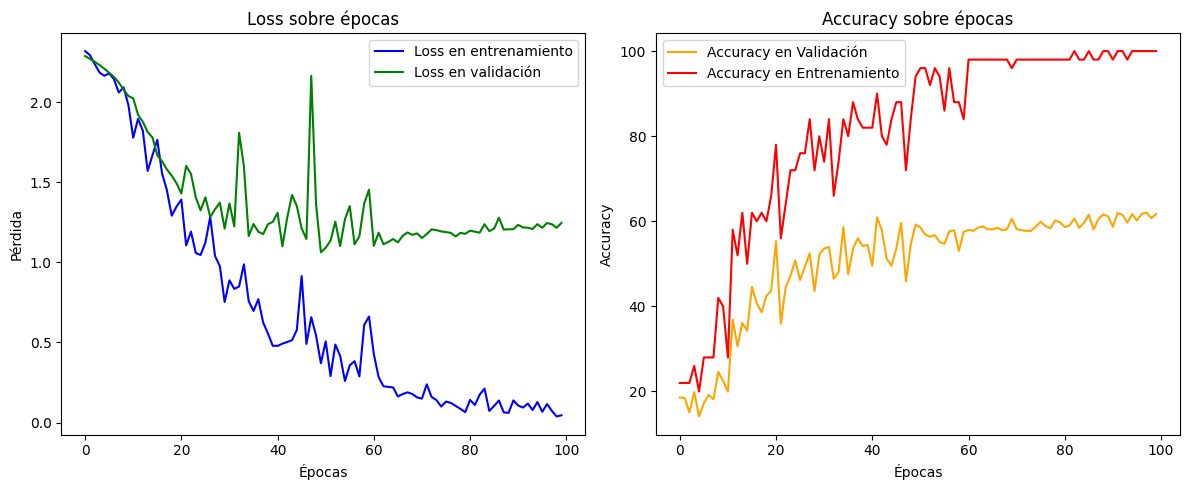

Cargando: 100%|██████████| 1/1 [00:40<00:00, 40.31s/it]


In [35]:
model3_cr = utils.test_model(parte_b.Red3, nn.CrossEntropyLoss(), 100, [32], True, [0.1])

## Red 4 - Tamaño de Lote
Se llega a resultados similares a la red anterior, reduciendo la combinación de hiperparametros donde se llega a valores de accuracy satisfactorios para el problema, esto puede deberse a que la red es demasiado compleja o que la cantidad de épocas ejecutadas no es suficiente para que la red aprenda los patrones necesarios para resolver el problema.

Cargando: 100%|██████████| 32/32 [45:53<00:00, 45.30s/it]  

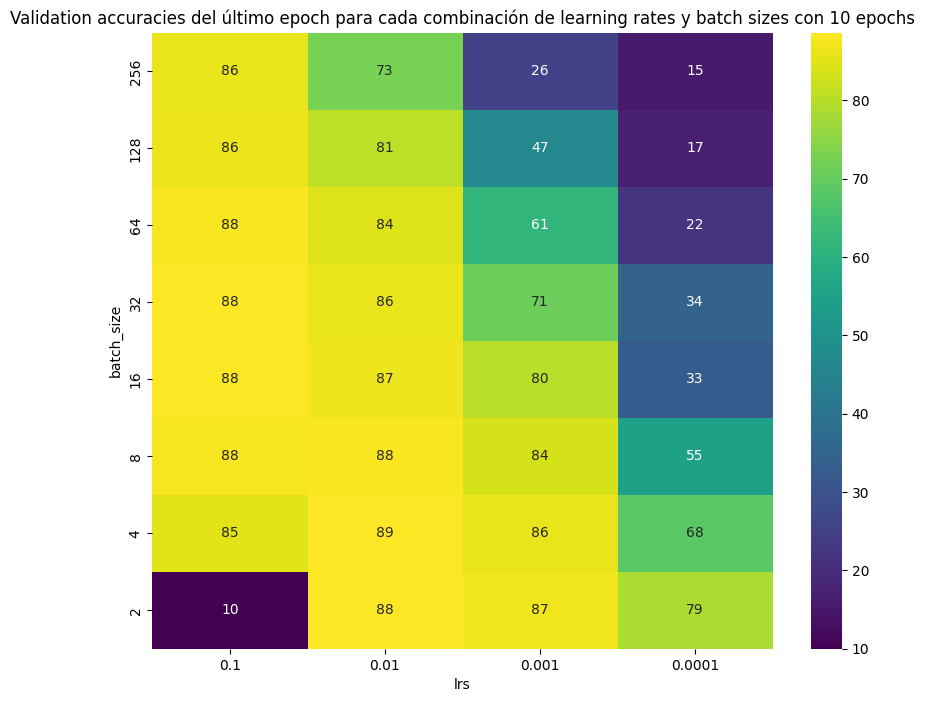

Cargando: 100%|██████████| 32/32 [45:54<00:00, 86.07s/it]


In [20]:
model4_b = utils.test_model(parte_b.Red4, nn.CrossEntropyLoss(), 10, [2,4,8,16,32,64,128,256], False, [0.1, 0.01, 0.001, 0.0001], False)

## Red 4 - Número de épocas
Al aumentar el número de épocas se observa que la red no logra mejorar su rendimiento en cuanto al conjunto de validación persistiendo el sobreajuste en el conjunto de entrenamiento.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/100, Loss: 0.6468, Training Accuracy: 78.2875, Validation Loss: 0.6246, Validation Accuracy: 78.4583
Epoch 2/100, Loss: 0.4575, Training Accuracy: 82.0854, Validation Loss: 0.5104, Validation Accuracy: 81.8250
Epoch 3/100, Loss: 0.4300, Training Accuracy: 84.0875, Validation Loss: 0.4536, Validation Accuracy: 83.7250
Epoch 4/100, Loss: 0.0843, Training Accuracy: 85.7687, Validation Loss: 0.4220, Validation Accuracy: 84.7500
Epoch 5/100, Loss: 0.5143, Training Accuracy: 86.2083, Validation Loss: 0.4081, Validation Accuracy: 85.4333
Epoch 6/100, Loss: 0.0901, Training Accuracy: 86.7417, Validation Loss: 0.3905, Validation Accuracy: 85.7750
Epoch 7/100, Loss: 0.2603, Training Accuracy: 87.4750, Validation Loss: 0.3800, Validation Accuracy: 86.1583
Epoch 8/100, Loss: 0.3552, Training Accuracy: 87.8750, Validation Loss: 0.3778, Validation Accuracy: 86.3583
Epoch 9/100, Loss: 0.4827, Training Accuracy: 88.9667, Validation Loss: 0.3533, Validation Accuracy: 87.4167
Epoch 10/100, Loss:

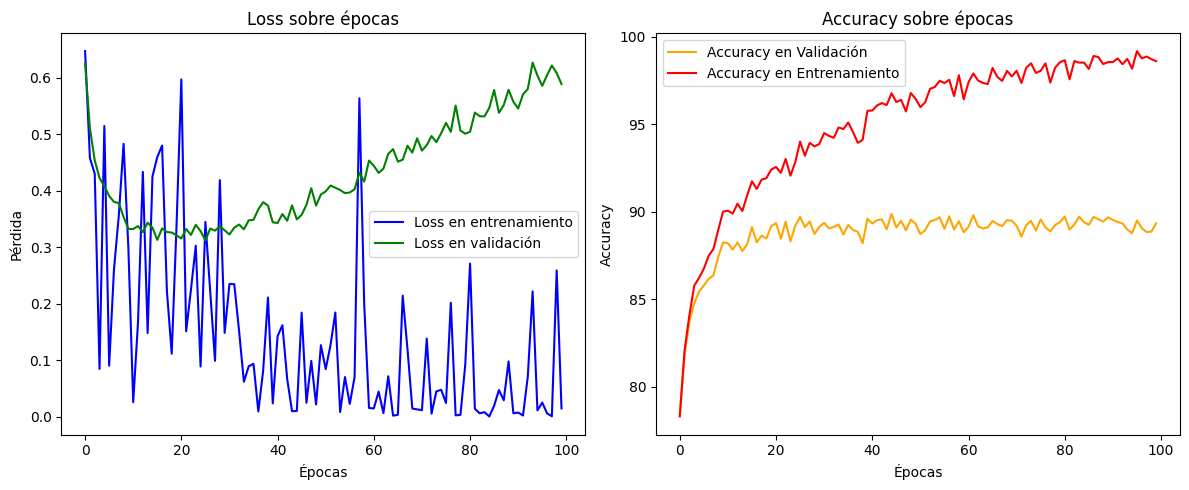

Cargando: 100%|██████████| 1/1 [10:00<00:00, 600.30s/it]


In [21]:
model4_e = utils.test_model(parte_b.Red4, nn.CrossEntropyLoss(), 100, [16], False, [0.01])

## Red 4 - Prueba con un conjunto reducido
El sobreajuste es muy lento para lo que se espera de un conjunto de entrenamiento tan reducido, lo que podría indicar que el enfoque tomado no es el ideal para la resolución del problema.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50, Loss: 2.2421, Training Accuracy: 12.0000, Validation Loss: 2.3024, Validation Accuracy: 11.0500
Epoch 2/50, Loss: 2.2399, Training Accuracy: 16.0000, Validation Loss: 2.3015, Validation Accuracy: 14.2333
Epoch 3/50, Loss: 2.2839, Training Accuracy: 20.0000, Validation Loss: 2.3008, Validation Accuracy: 13.5833
Epoch 4/50, Loss: 2.2975, Training Accuracy: 16.0000, Validation Loss: 2.3003, Validation Accuracy: 12.2583
Epoch 5/50, Loss: 2.3738, Training Accuracy: 18.0000, Validation Loss: 2.2994, Validation Accuracy: 12.6750
Epoch 6/50, Loss: 2.2701, Training Accuracy: 22.0000, Validation Loss: 2.2986, Validation Accuracy: 14.0417
Epoch 7/50, Loss: 2.3005, Training Accuracy: 22.0000, Validation Loss: 2.2977, Validation Accuracy: 18.2500
Epoch 8/50, Loss: 2.2750, Training Accuracy: 18.0000, Validation Loss: 2.2969, Validation Accuracy: 18.8500
Epoch 9/50, Loss: 2.2864, Training Accuracy: 18.0000, Validation Loss: 2.2962, Validation Accuracy: 18.5250
Epoch 10/50, Loss: 2.2990, T

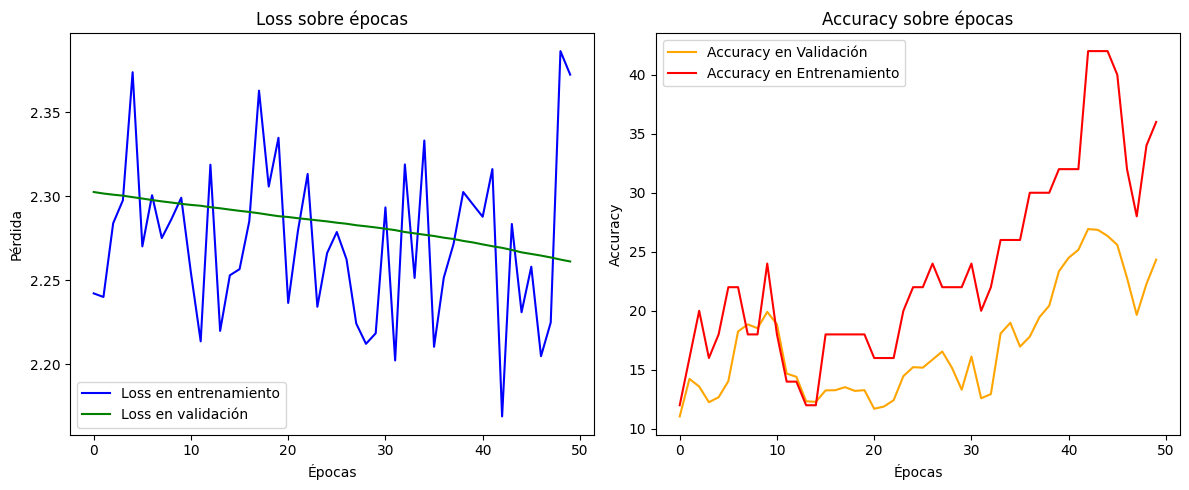

Cargando: 100%|██████████| 1/1 [00:37<00:00, 37.77s/it]


In [32]:
model4_cr = utils.test_model(parte_b.Red4, nn.CrossEntropyLoss(), 50, [16], True, [0.01])

## Red 5 - Tamaño de Lote
Se genera una prueba límite aumentando de forma exagerada la complejidad de la red para verificar si el enfoque tomado de seguir complejizando la red es el adecuado.
Se obtienen resultados peores a los obtenidos con las redes anteriores, reduciendo aún más la cantidad de combinaciones de hiperparámetros que generan buenos resultados.

Cargando: 100%|██████████| 32/32 [49:52<00:00, 48.20s/it]  

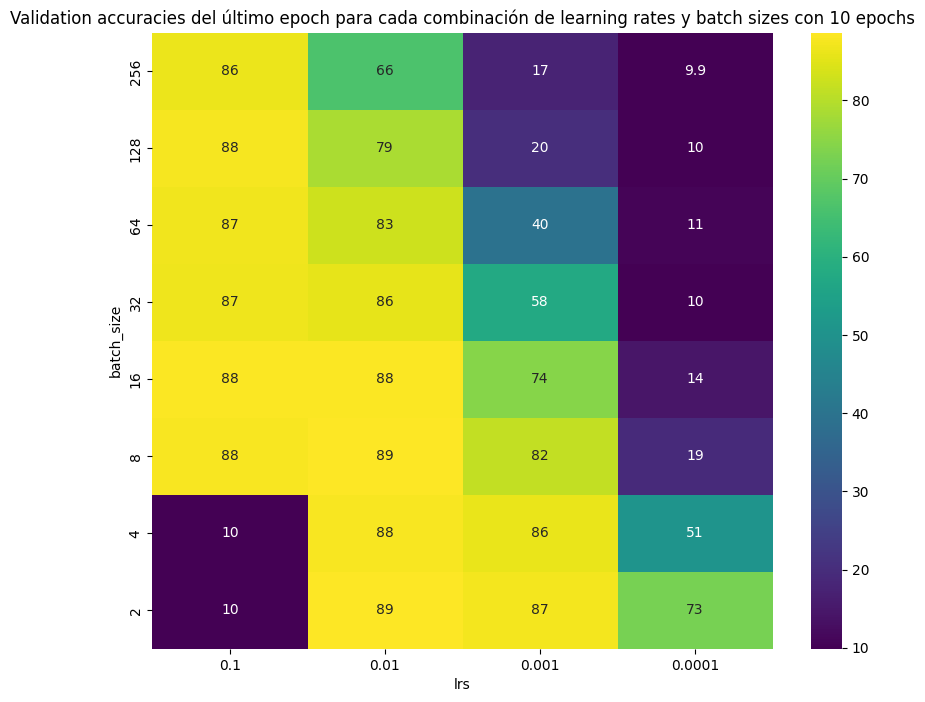

Cargando: 100%|██████████| 32/32 [49:52<00:00, 93.51s/it]


In [23]:
model5_b = utils.test_model(parte_b.Red5, nn.CrossEntropyLoss(), 10, [2, 4, 8, 16, 32, 64, 128, 256], False,
                         [0.1, 0.01, 0.001, 0.0001], False)

## Red 5 - Conjunto reducido
Se confirma lo mencionado anteriormente, el sobreajuste es muy lento para lo que se espera de un conjunto de entrenamiento tan reducido, se decide no continuar con este enfoque y se opta por cambiar la arquitectura de la red.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50, Loss: 2.3609, Training Accuracy: 10.0000, Validation Loss: 2.3030, Validation Accuracy: 9.4167
Epoch 2/50, Loss: 2.3631, Training Accuracy: 10.0000, Validation Loss: 2.3014, Validation Accuracy: 9.6833
Epoch 3/50, Loss: 2.3139, Training Accuracy: 10.0000, Validation Loss: 2.2999, Validation Accuracy: 9.8417
Epoch 4/50, Loss: 2.3411, Training Accuracy: 10.0000, Validation Loss: 2.2980, Validation Accuracy: 9.9083
Epoch 5/50, Loss: 2.2657, Training Accuracy: 12.0000, Validation Loss: 2.2965, Validation Accuracy: 10.0333
Epoch 6/50, Loss: 2.3102, Training Accuracy: 12.0000, Validation Loss: 2.2948, Validation Accuracy: 10.0750
Epoch 7/50, Loss: 2.2516, Training Accuracy: 18.0000, Validation Loss: 2.2936, Validation Accuracy: 10.6083
Epoch 8/50, Loss: 2.2749, Training Accuracy: 18.0000, Validation Loss: 2.2921, Validation Accuracy: 12.0250
Epoch 9/50, Loss: 2.3217, Training Accuracy: 18.0000, Validation Loss: 2.2906, Validation Accuracy: 11.9167
Epoch 10/50, Loss: 2.2016, Train

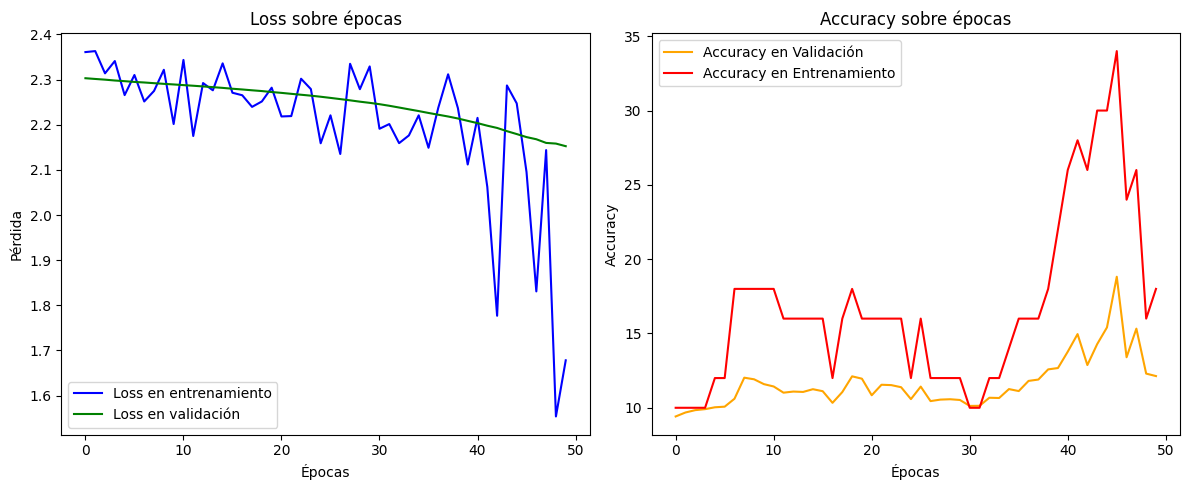

Cargando: 100%|██████████| 1/1 [00:40<00:00, 40.03s/it]


In [36]:
model5_cr = utils.test_model(parte_b.Red5, nn.CrossEntropyLoss(), 50, [8], True, [0.01])

## Red 6 - Tamaño de Lote
En esta arquitectura se cambia el enfoque, se prueba con 3 capas ocultas donde la cantidad de neuronas de las capas no es decreciente. La primera capa oculta tiene 256 neuronas, la segunda 512 y la tercera 256.
Las combinaciones de hiperparametros donde el modelo es satisfactorio mejoran con respecto a la red más profunda anterior, esto puede deberse a que la red es más simple y, por lo tanto, más fácil de entrenar.

Cargando: 100%|██████████| 32/32 [44:50<00:00, 43.99s/it]  

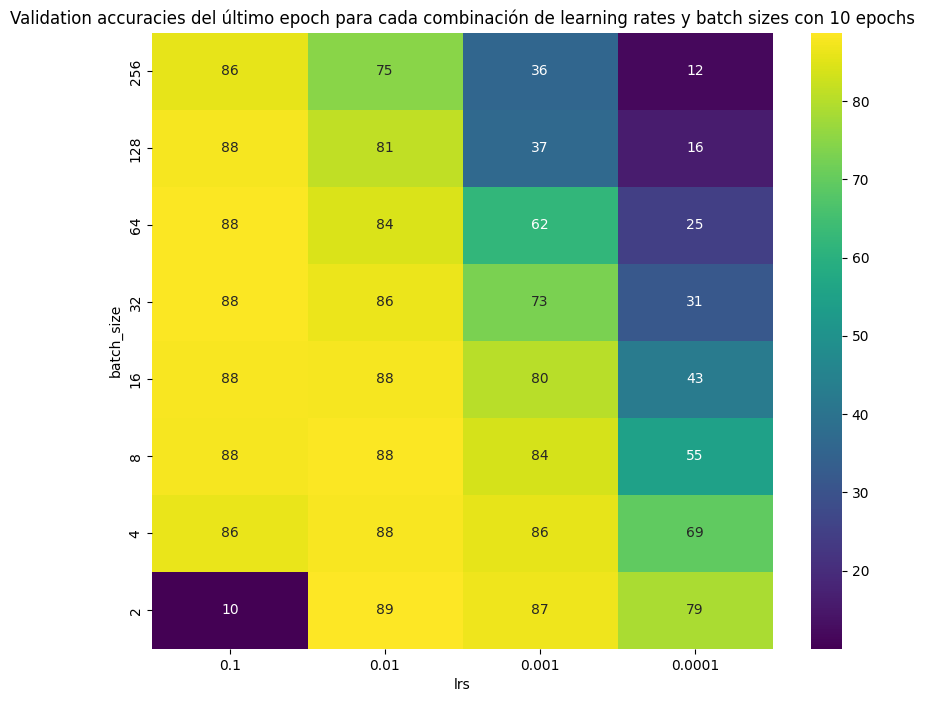

Cargando: 100%|██████████| 32/32 [44:50<00:00, 84.08s/it]


In [24]:
model6_b = utils.test_model(parte_b.Red6, nn.CrossEntropyLoss(), 10, [2, 4, 8, 16, 32, 64, 128, 256], False,
                         [0.1, 0.01, 0.001, 0.0001], False)

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50, Loss: 2.3555, Training Accuracy: 16.0000, Validation Loss: 2.2969, Validation Accuracy: 14.5833
Epoch 2/50, Loss: 2.2750, Training Accuracy: 18.0000, Validation Loss: 2.2921, Validation Accuracy: 15.4833
Epoch 3/50, Loss: 2.2833, Training Accuracy: 22.0000, Validation Loss: 2.2871, Validation Accuracy: 13.8333
Epoch 4/50, Loss: 2.2953, Training Accuracy: 20.0000, Validation Loss: 2.2812, Validation Accuracy: 13.0750
Epoch 5/50, Loss: 2.2354, Training Accuracy: 24.0000, Validation Loss: 2.2745, Validation Accuracy: 12.4250
Epoch 6/50, Loss: 2.3061, Training Accuracy: 28.0000, Validation Loss: 2.2666, Validation Accuracy: 12.2750
Epoch 7/50, Loss: 2.3332, Training Accuracy: 30.0000, Validation Loss: 2.2573, Validation Accuracy: 13.3167
Epoch 8/50, Loss: 2.2843, Training Accuracy: 32.0000, Validation Loss: 2.2458, Validation Accuracy: 14.1250
Epoch 9/50, Loss: 2.2815, Training Accuracy: 30.0000, Validation Loss: 2.2324, Validation Accuracy: 15.6000
Epoch 10/50, Loss: 2.1744, T

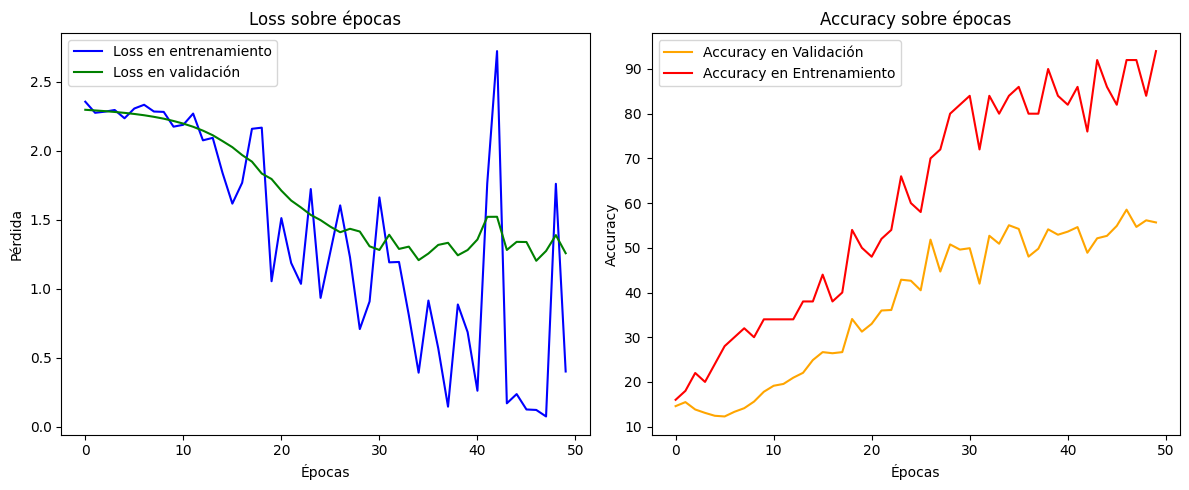

Cargando: 100%|██████████| 1/1 [01:55<00:00, 115.27s/it]


In [45]:
model6_cr = utils.test_model(parte_b.Red6, nn.CrossEntropyLoss(), 50, [2], True,
                         [0.01])

## Red 7 - Tamaño de Lote
Se reduce el tamaño de las capas ocultas de la red, el modelo cuenta con una capa de 256 neuronas, una de 128 y una de 64.

Cargando: 100%|██████████| 32/32 [37:30<00:00, 34.55s/it]  

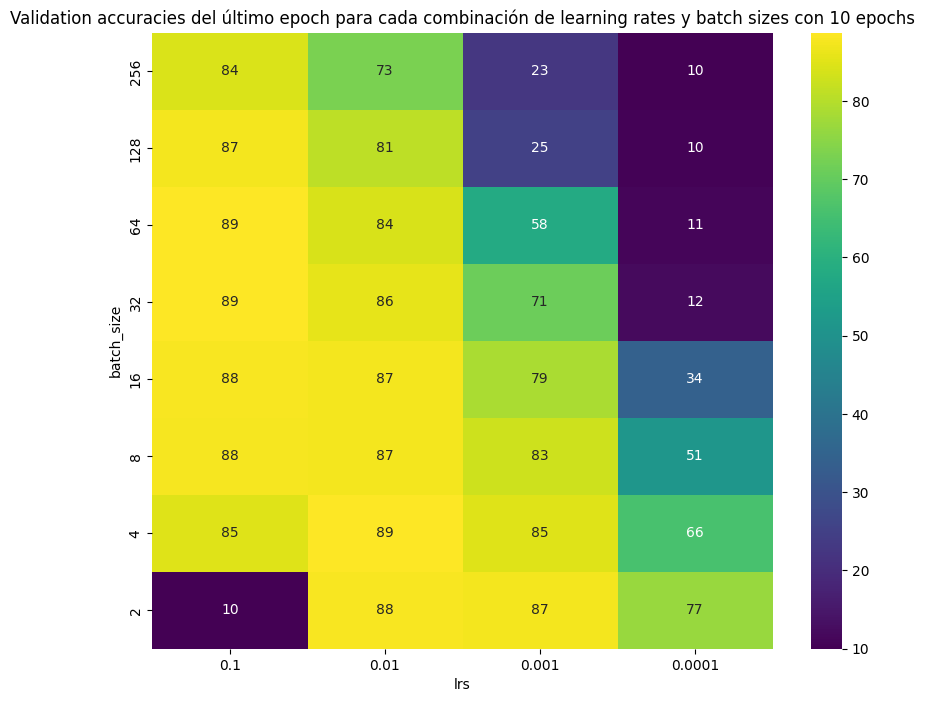

Cargando: 100%|██████████| 32/32 [37:30<00:00, 70.34s/it]


In [25]:
model7_b = utils.test_model(parte_b.Red7, nn.CrossEntropyLoss(), 10, [2, 4, 8, 16, 32, 64, 128, 256], False,
                         [0.1, 0.01, 0.001, 0.0001], False)


## Red 7 - Conjunto reducido
A pesar de tener un rendimiento aceptable, el sobreajuste a un conjunto de entrenamiento reducido es muy lento, se concluye que eliminar una capa de 512 neuronas es reducir demasiado la complejidad de la red.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50, Loss: 2.3095, Training Accuracy: 16.0000, Validation Loss: 2.3024, Validation Accuracy: 9.3583
Epoch 2/50, Loss: 2.3152, Training Accuracy: 16.0000, Validation Loss: 2.3001, Validation Accuracy: 10.1167
Epoch 3/50, Loss: 2.3051, Training Accuracy: 18.0000, Validation Loss: 2.2977, Validation Accuracy: 11.9250
Epoch 4/50, Loss: 2.3135, Training Accuracy: 24.0000, Validation Loss: 2.2954, Validation Accuracy: 15.4167
Epoch 5/50, Loss: 2.2664, Training Accuracy: 30.0000, Validation Loss: 2.2931, Validation Accuracy: 21.4250
Epoch 6/50, Loss: 2.2794, Training Accuracy: 40.0000, Validation Loss: 2.2909, Validation Accuracy: 28.1917
Epoch 7/50, Loss: 2.2714, Training Accuracy: 44.0000, Validation Loss: 2.2886, Validation Accuracy: 29.8917
Epoch 8/50, Loss: 2.2522, Training Accuracy: 48.0000, Validation Loss: 2.2861, Validation Accuracy: 31.9000
Epoch 9/50, Loss: 2.2598, Training Accuracy: 46.0000, Validation Loss: 2.2833, Validation Accuracy: 30.8417
Epoch 10/50, Loss: 2.3097, Tr

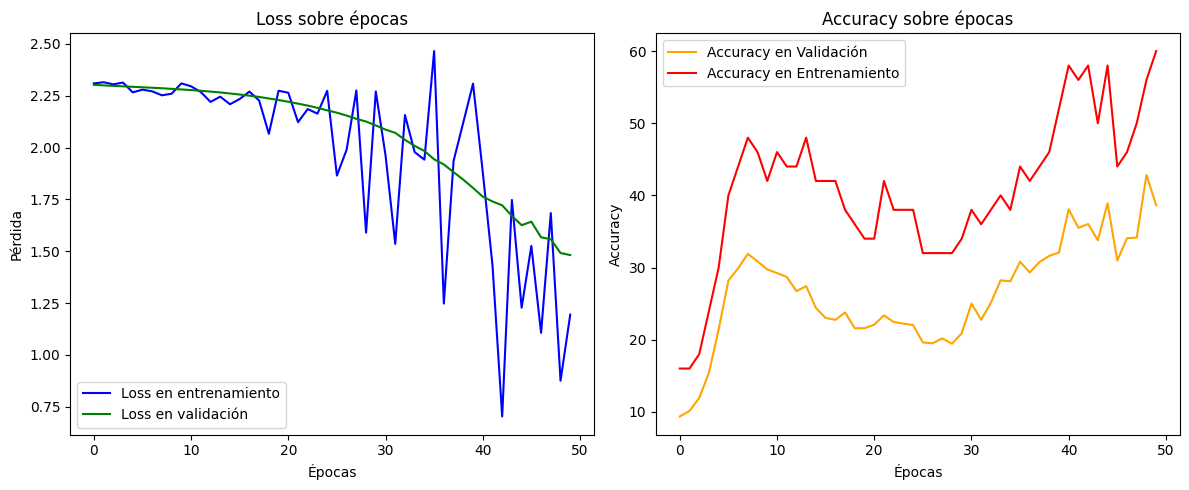

Cargando: 100%|██████████| 1/1 [00:58<00:00, 58.01s/it]


In [46]:
model6_cr = utils.test_model(parte_b.Red6, nn.CrossEntropyLoss(), 50, [4], True,
                         [0.01])

In [54]:
import torch

x_test = torch.tensor(utils.read_mnist_images('dataset/t10k-images-idx3-ubyte'), dtype=torch.float32) / 255.0
y_test = torch.tensor(utils.read_mnist_labels('dataset/t10k-labels-idx1-ubyte'), dtype=torch.int64)
x_train = torch.tensor(utils.read_mnist_images('dataset/train-images-idx3-ubyte'), dtype=torch.float32) / 255.0
y_train = torch.tensor(utils.read_mnist_labels('dataset/train-labels-idx1-ubyte'), dtype=torch.int64)

## Pruebas agregando regularización
Se selecciona la Red 3 de la parte b ya que fue el modelo que obtuvo mejores resultados en términos de accuracy en el conjunto de validación y con un espacio amplio de hiperparametros que generan buenos resultados. Esto último es importante porque facilita llegar a un buen resultado sin tener que hacer una búsqueda muy exhaustiva de hiperparametros.

Durante el entrenamiento en la Red 3 se observa un sobre-ajuste muy significativo, por esto se opta por utilizar métodos de regularización para reducir este comportamiento.

Los métodos de regularización penalizan o limitan la complejidad del modelo que se intenta generar. Esto puede ayudar a evitar que el modelo sobreajuste con facilidad.

Se prueban dos tipos de regularización: L2 y Dropout.

La regularización L2 requiere agregar a la función de perdida un termino adicional que toma un valor proporcional a la suma de los cuadrados de los pesos de la red. Evitando que el modelo pueda tomar valores muy grandes en sus pesos y, por lo tanto, reduciendo la complejidad.

La regularización mediante capas Dropout logra reducir la complejidad de la red durante el entrenamiento mediante la "desactivación" de neuronas de la capa. Se establece una probabilidad según la cual aleatoriamente distintas neuronas de la capa serán desactivadas durante el entrenamiento, de esta forma, se logra evitar que la red "dependa" demasiado de los valores de activación que tomen determinadas neuronas en particular.

### Red 3 - Regularización Dropout 0.3
Se le aplica regularización por dropout a la Red 3, este cambio genera una mejora en el sobreajuste del modelo con respecto a la Red 3 original, esto se puede observar en la gráfica de accuracy en el conjunto de validación, donde el modelo con regularización tiene un mejor rendimiento que el modelo original.
Las capas de dropout se aplican luego de la función de activación de cada capa oculta.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.4697, Training Accuracy: 81.7521, Validation Loss: 0.5132, Validation Accuracy: 81.1750
Epoch 2/150, Loss: 0.4155, Training Accuracy: 85.9979, Validation Loss: 0.3988, Validation Accuracy: 85.1500
Epoch 3/150, Loss: 0.3642, Training Accuracy: 84.8167, Validation Loss: 0.4169, Validation Accuracy: 84.2500
Epoch 4/150, Loss: 0.7349, Training Accuracy: 86.7479, Validation Loss: 0.3966, Validation Accuracy: 85.7167
Epoch 5/150, Loss: 0.3113, Training Accuracy: 88.2354, Validation Loss: 0.3535, Validation Accuracy: 87.2083
Epoch 6/150, Loss: 0.4766, Training Accuracy: 88.7687, Validation Loss: 0.3407, Validation Accuracy: 87.3333
Epoch 7/150, Loss: 0.2344, Training Accuracy: 88.1521, Validation Loss: 0.3571, Validation Accuracy: 86.9583
Epoch 8/150, Loss: 0.2050, Training Accuracy: 89.2729, Validation Loss: 0.3321, Validation Accuracy: 88.0833
Epoch 9/150, Loss: 0.3773, Training Accuracy: 89.4729, Validation Loss: 0.3356, Validation Accuracy: 87.6167
Epoch 10/150, Loss:

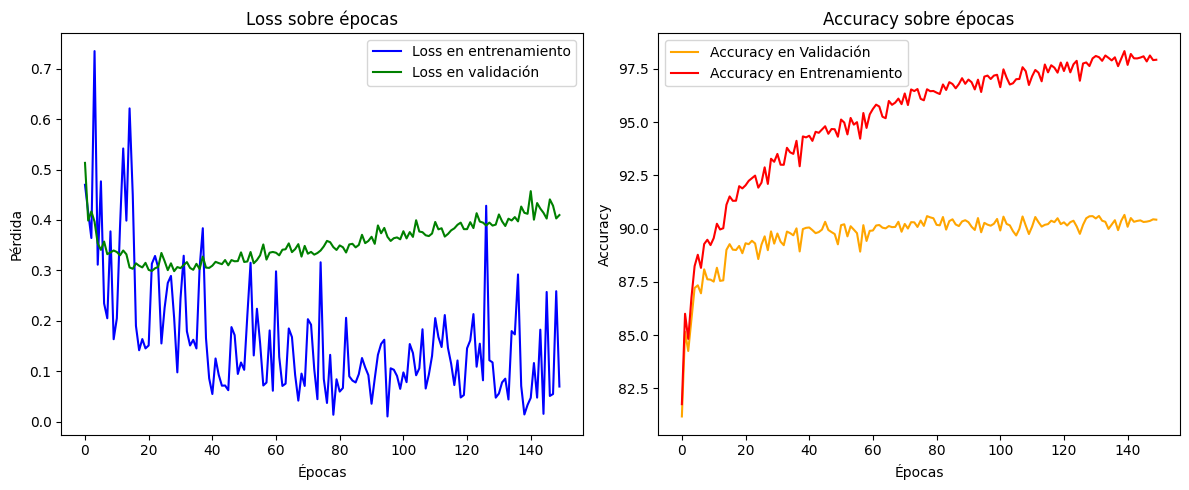

Cargando: 100%|██████████| 1/1 [25:24<00:00, 1524.19s/it]


In [64]:
model1_drop = utils.test_model(parte_c.RedDropout, nn.CrossEntropyLoss(), 150, [32], False,
                         [0.1], True)

### Red 3 - Regularización Dropout 0.25
Se disminuye el dropout a 0.25 para verificar si se logra una mejora en el rendimiento, además se agrega una capa de dropout aplicada a la entrada de la red para reducir la dependencia de la misma con respecto a los datos de entrada, con el fin de que la red sea más robusta.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 2.1025, Training Accuracy: 45.9083, Validation Loss: 2.0481, Validation Accuracy: 46.3583
Epoch 2/150, Loss: 1.4764, Training Accuracy: 56.2563, Validation Loss: 1.5394, Validation Accuracy: 56.6500
Epoch 3/150, Loss: 1.1704, Training Accuracy: 62.2104, Validation Loss: 1.1960, Validation Accuracy: 62.2000
Epoch 4/150, Loss: 1.1657, Training Accuracy: 66.3271, Validation Loss: 1.0055, Validation Accuracy: 66.5167
Epoch 5/150, Loss: 0.9156, Training Accuracy: 67.8688, Validation Loss: 0.8958, Validation Accuracy: 68.1000
Epoch 6/150, Loss: 0.9898, Training Accuracy: 69.1562, Validation Loss: 0.8269, Validation Accuracy: 69.4000
Epoch 7/150, Loss: 0.8275, Training Accuracy: 70.8500, Validation Loss: 0.7829, Validation Accuracy: 71.3000
Epoch 8/150, Loss: 0.9890, Training Accuracy: 72.1208, Validation Loss: 0.7507, Validation Accuracy: 72.3083
Epoch 9/150, Loss: 0.6950, Training Accuracy: 73.0833, Validation Loss: 0.7222, Validation Accuracy: 73.4667
Epoch 10/150, Loss:

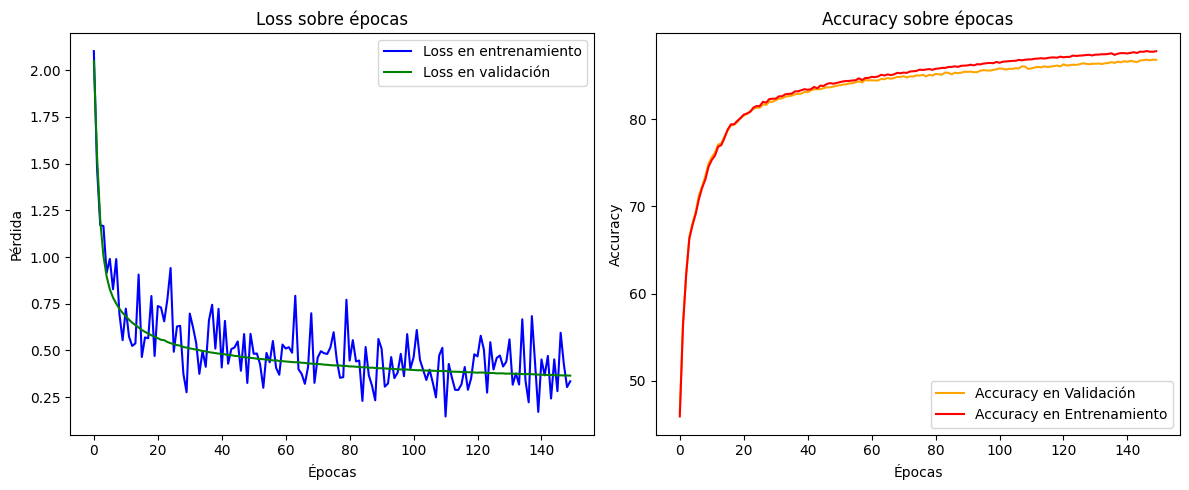

Cargando: 100%|██████████| 1/1 [17:43<00:00, 1063.55s/it]


In [41]:
model2_drop = utils.test_model(parte_c.RedDropout2, nn.CrossEntropyLoss(), 150, [32], False,
                         [0.001], True, 0.0)

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.4438, Training Accuracy: 82.5750, Validation Loss: 0.4976, Validation Accuracy: 82.1833
Epoch 2/150, Loss: 0.6001, Training Accuracy: 83.7396, Validation Loss: 0.4414, Validation Accuracy: 83.2417
Epoch 3/150, Loss: 0.5018, Training Accuracy: 85.9958, Validation Loss: 0.3919, Validation Accuracy: 85.6917
Epoch 4/150, Loss: 0.3608, Training Accuracy: 86.4229, Validation Loss: 0.3912, Validation Accuracy: 85.6500
Epoch 5/150, Loss: 0.3675, Training Accuracy: 86.3958, Validation Loss: 0.3849, Validation Accuracy: 85.4667
Epoch 6/150, Loss: 0.4203, Training Accuracy: 88.0458, Validation Loss: 0.3554, Validation Accuracy: 87.1333
Epoch 7/150, Loss: 0.3183, Training Accuracy: 88.1562, Validation Loss: 0.3513, Validation Accuracy: 86.9167
Epoch 8/150, Loss: 0.2206, Training Accuracy: 88.5104, Validation Loss: 0.3376, Validation Accuracy: 87.4167
Epoch 9/150, Loss: 0.4089, Training Accuracy: 88.4729, Validation Loss: 0.3396, Validation Accuracy: 87.2833
Epoch 10/150, Loss:

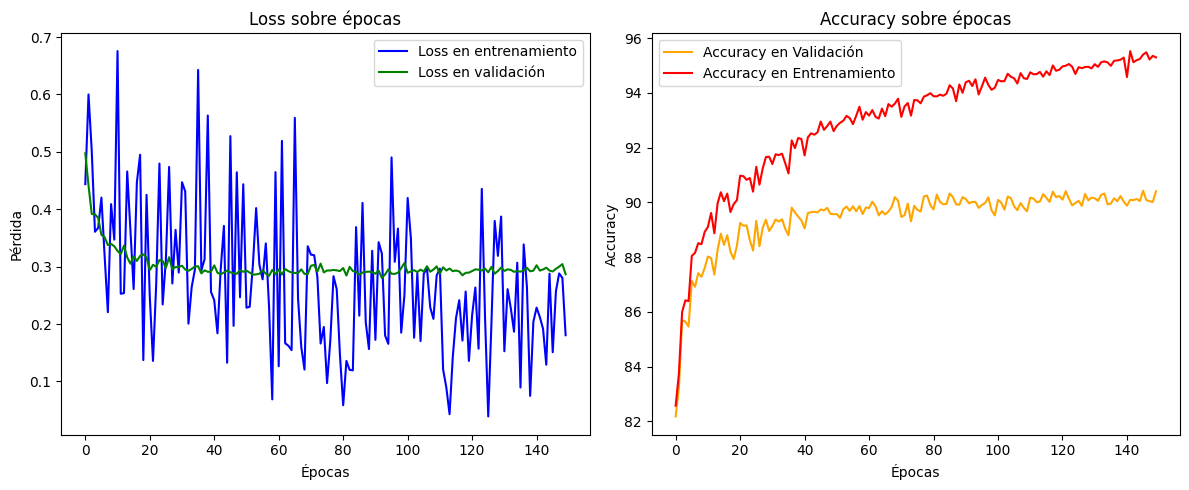

Cargando: 100%|██████████| 1/1 [14:30<00:00, 870.43s/it]


In [49]:
model3_drop = utils.test_model(parte_c.RedDropout2, nn.CrossEntropyLoss(), 150, [32], False,
                         [0.097], True, 0.0)

### Red 3 - Regularización L2
Se prueba con regularización L2 con el fin de comparar los resultados con la regularización Dropout.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/100, Loss: 0.3312, Training Accuracy: 81.5229, Validation Loss: 0.5148, Validation Accuracy: 80.4250
Epoch 2/100, Loss: 0.4592, Training Accuracy: 84.0667, Validation Loss: 0.4321, Validation Accuracy: 83.3500
Epoch 3/100, Loss: 0.2787, Training Accuracy: 87.1333, Validation Loss: 0.3824, Validation Accuracy: 86.1750
Epoch 4/100, Loss: 0.3990, Training Accuracy: 86.6021, Validation Loss: 0.3908, Validation Accuracy: 85.4500
Epoch 5/100, Loss: 0.6711, Training Accuracy: 86.7083, Validation Loss: 0.3972, Validation Accuracy: 85.3083
Epoch 6/100, Loss: 0.3630, Training Accuracy: 84.2417, Validation Loss: 0.4527, Validation Accuracy: 83.5083
Epoch 7/100, Loss: 0.2239, Training Accuracy: 86.9521, Validation Loss: 0.3860, Validation Accuracy: 85.9500
Epoch 8/100, Loss: 0.2885, Training Accuracy: 87.5083, Validation Loss: 0.3686, Validation Accuracy: 86.1833
Epoch 9/100, Loss: 0.3188, Training Accuracy: 89.1125, Validation Loss: 0.3432, Validation Accuracy: 87.4333
Epoch 10/100, Loss:

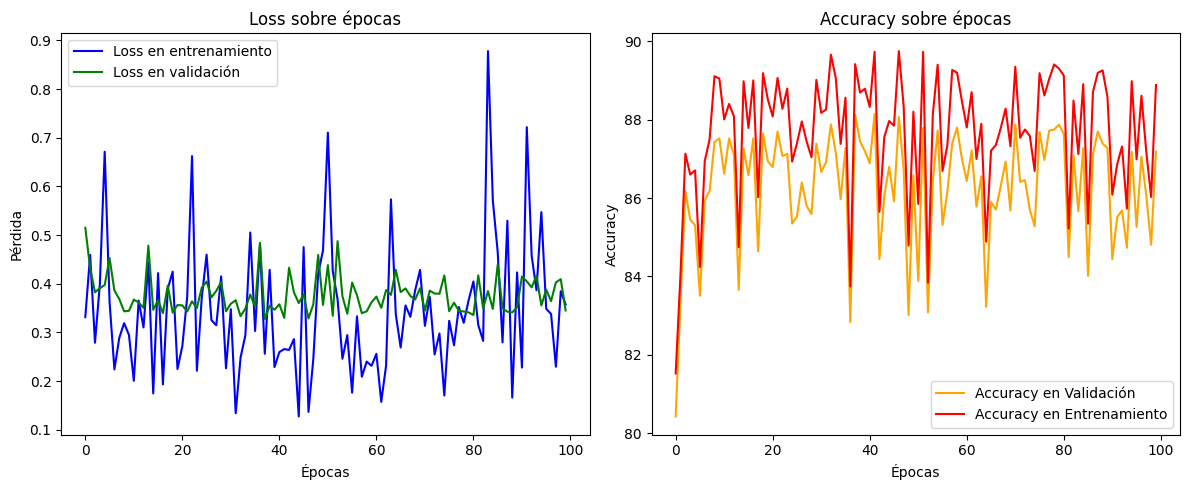

Cargando: 100%|██████████| 1/1 [06:47<00:00, 407.09s/it]


In [27]:
model4_drop = utils.test_model(parte_c.Red, nn.CrossEntropyLoss(), 100, [32], False,
                         [0.2], True, 0.001)

### Red 3 - Regularización con L2 0.0001
Se prueba con regularización L2 reduciendo el valor del parámetro para verificar si se logra una mejora en el rendimiento.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/200, Loss: 0.3560, Training Accuracy: 85.1521, Validation Loss: 0.4266, Validation Accuracy: 84.6583
Epoch 2/200, Loss: 0.5340, Training Accuracy: 86.8563, Validation Loss: 0.3889, Validation Accuracy: 85.5083
Epoch 3/200, Loss: 0.1518, Training Accuracy: 87.4500, Validation Loss: 0.3890, Validation Accuracy: 86.3750
Epoch 4/200, Loss: 0.3368, Training Accuracy: 87.8896, Validation Loss: 0.3718, Validation Accuracy: 86.1667
Epoch 5/200, Loss: 0.3663, Training Accuracy: 89.4875, Validation Loss: 0.3335, Validation Accuracy: 87.9083
Epoch 6/200, Loss: 0.3259, Training Accuracy: 89.2250, Validation Loss: 0.3363, Validation Accuracy: 87.1417
Epoch 7/200, Loss: 0.2064, Training Accuracy: 90.2208, Validation Loss: 0.3212, Validation Accuracy: 88.1583
Epoch 8/200, Loss: 0.3802, Training Accuracy: 90.2687, Validation Loss: 0.3291, Validation Accuracy: 87.7000
Epoch 9/200, Loss: 0.3030, Training Accuracy: 90.4042, Validation Loss: 0.3347, Validation Accuracy: 88.1917
Epoch 10/200, Loss:

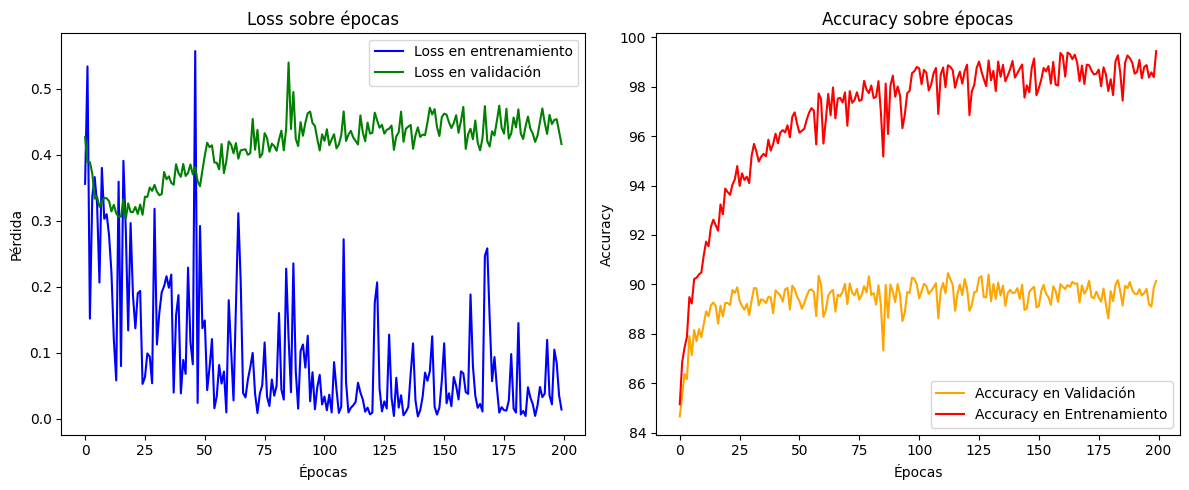

Cargando: 100%|██████████| 1/1 [13:35<00:00, 815.89s/it]


In [28]:
model5_drop = utils.test_model(parte_c.Red, nn.CrossEntropyLoss(), 200, [32], False,
                         [0.1], True, 0.0001)

# Entrenamiento sobre modelo final con todo el conjunto de entrenamiento
Con el modelo que obtuvo mejor resultado en la parte anterior se entrena sobre todo el conjunto de entrenamiento y se evalúa sobre el conjunto de pruebas para obtener una métrica final del modelo.

Cargando:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.5063, Training Accuracy: 82.7517, Validation Loss: 0.4804, Validation Accuracy: 81.2700
Epoch 2/150, Loss: 0.3671, Training Accuracy: 86.3833, Validation Loss: 0.4080, Validation Accuracy: 84.7900
Epoch 3/150, Loss: 0.3302, Training Accuracy: 86.5933, Validation Loss: 0.4112, Validation Accuracy: 84.7600
Epoch 4/150, Loss: 0.4801, Training Accuracy: 87.3167, Validation Loss: 0.3914, Validation Accuracy: 85.6700
Epoch 5/150, Loss: 0.0895, Training Accuracy: 88.3367, Validation Loss: 0.3658, Validation Accuracy: 86.6900
Epoch 6/150, Loss: 0.3683, Training Accuracy: 88.7333, Validation Loss: 0.3659, Validation Accuracy: 86.9700
Epoch 7/150, Loss: 0.3495, Training Accuracy: 89.5000, Validation Loss: 0.3454, Validation Accuracy: 87.3800
Epoch 8/150, Loss: 0.3292, Training Accuracy: 89.9467, Validation Loss: 0.3387, Validation Accuracy: 87.4600
Epoch 9/150, Loss: 0.3202, Training Accuracy: 89.9500, Validation Loss: 0.3340, Validation Accuracy: 87.4100
Epoch 10/150, Loss:

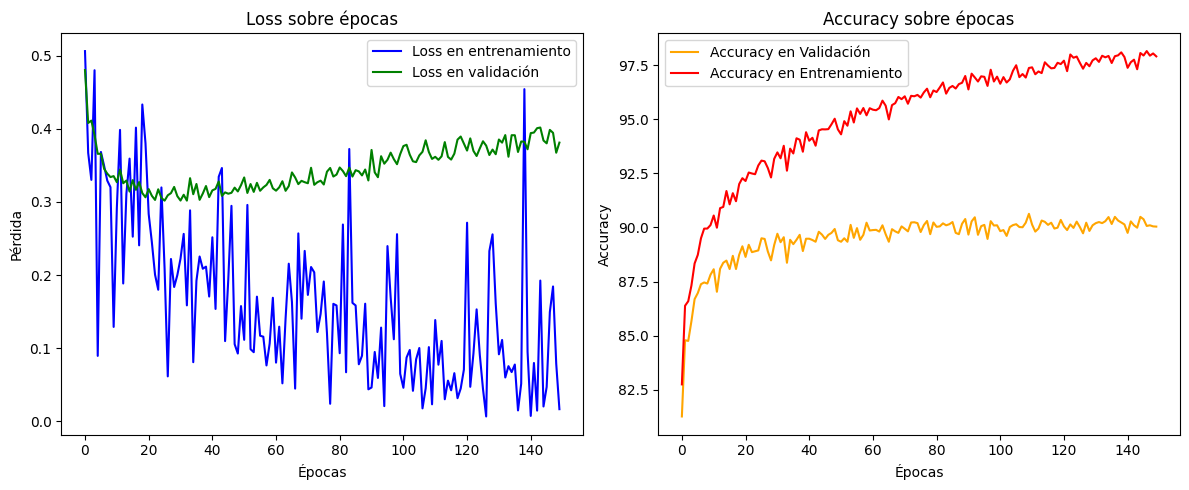

Cargando: 100%|██████████| 1/1 [17:29<00:00, 1049.73s/it]


In [66]:
model_test = utils.test_model(parte_c.RedDropout, nn.CrossEntropyLoss(), 150, [32], False,
                         [0.097], True, 0.0, x_train, y_train, x_test, y_test)

# Métricas del modelo
Se analizan las métricas del rendimiento de nuestro modelo evaluando las métricas accuracy, recuperación, Macro F1 y la precisión. Estas métricas proveen una evaluación de la capacidad del modelo para clasificar los datos de Fashion MNIST. Además, se compara los modelos con algunos existentes, poniendo en perspectiva qué tan bien se desempeña.

En la página de github donde se encuentra publicado el dataset contente también medidas del rendimiento de otros modelos generados con distintos métodos y arquitecturas para resolver el mismo problema. Los valores de accuracy publicados toman valores entre 87,6% y 96,7%.
Nuestro modelo obtiene un rendimiento de 90.04% que, si bien se encuentra alejado de aquellos con mejor funcionamiento, es considerablemente efectivo resolviendo la tarea planteada si tenemos en cuenta que estos valores altos de accuracy se obtienen utilizando arquitecturas considerados superiores para resolver problemas de clasificación de imágenes donde las redes neuronales FF como la utilizada en este laboratorio se encuentran en desventaja.

Algunos aspectos a considerar es que nuestro modelo clasifica mejor que un humano en promedio (que logra una accuracy de 83.5%), según encuestas realizadas sobre Fashion MNIST a personas aleatorias que no tuvieran conocimientos de moda.

Por otro lado, la matriz de confusión muestra que el modelo tiene problemas para diferenciar Coat, Dress, Pullover y T-shirt/top, en partícular suele predecir Shirt cuando la clasificación correcta es una de las mencionadas, o el caso contrario. Esto puede deberse a que estas prendas comparten características similares, como por ejemplo, la forma de las mangas, el largo de la prenda, etc. Por lo tanto, es esperable que el modelo tenga problemas para diferenciarlas.

# Peores clasificaciones del modelo
Junto con las métricas, también se analizan las 10 peores clasificaciones que nuestro modelo tuvo respecto al conjunto de prueba, utilizando como medida la entropía cruzada. Este análisis puede darnos ideas de cómo "piensa" nuestro modelo, los desafíos que enfrenta y explorar patrones que contribuyan a errores de clasificación. Nos dará una mejora comprensión de las limitantes de nuestro modelo para poder ajustar a estos casos y mejorar su rendimiento general.

Se observa que la mayoría de los casos donde el modelo tiene problemas para clasificar correctamente se debe a imágenes ambiguas donde incluso es difícil clasificar por un ser humano.

Además, la imagen con mayor perdida es una que presenta un calzado en una disposición poco común y distinta a la utilizada para el resto de prendas de este tipo, por lo que es natural que el modelo no lo pueda clasificar. Algo similar sucede con la quinta imagen, donde no exhibe ninguna de las características que poseen las prendas de este tipo, tanto es así que es difícil para un humano clasificarla correctamente (parece un perro).
Finalmente, las últimas cinco imágenes son fácilmente confundibles.

Accuracy: 90.04%
Macro F1: 0.90
Precision: 0.90
Recall: 0.90


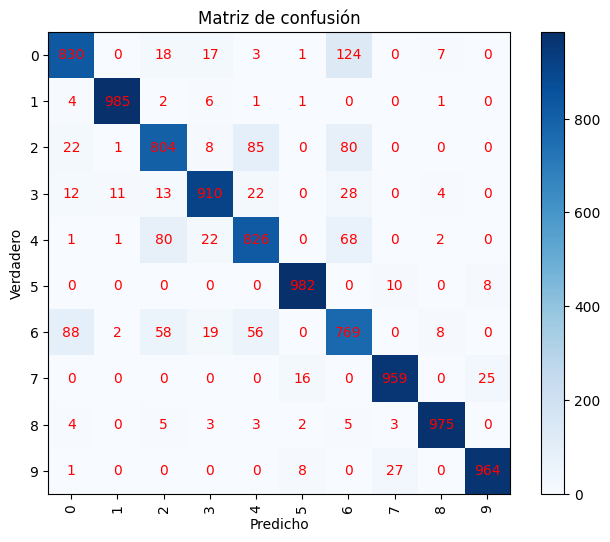

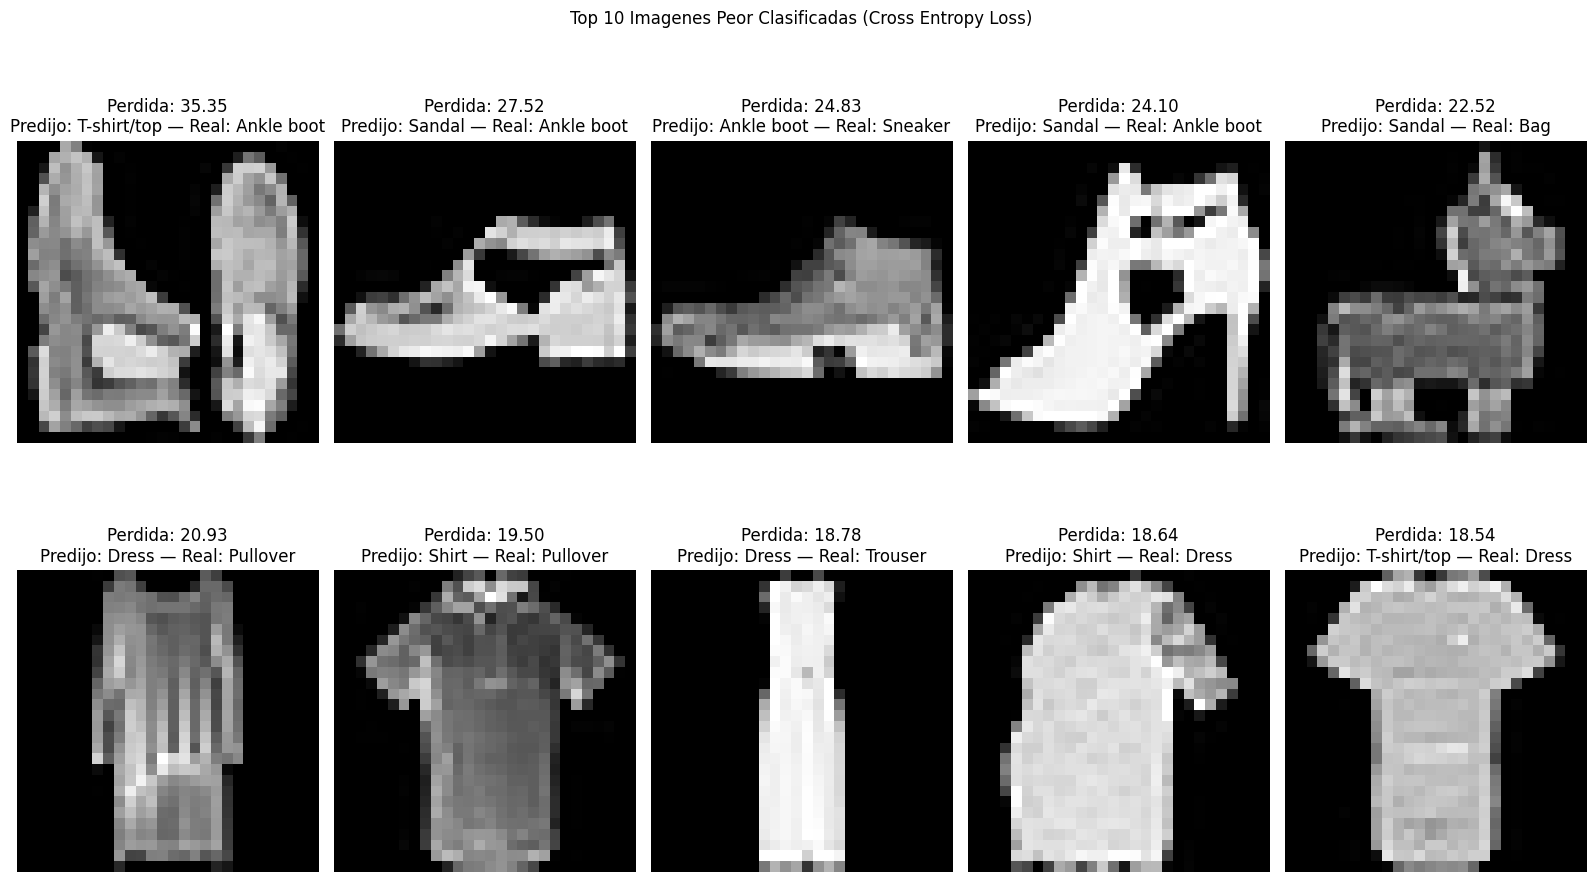

In [71]:
utils.test(x_test, y_test, model_test[0])

# Conclusiones
En esta tarea, se condujo una experimentación extensiva con varios modelos de aprendizaje automático, se partió de una red neuronal base la cual se mejoró agregando complejidad y ajustando hiperparámetros a través de búsqueda en cuadrícula, para cada uno de estos modelos se comparó sus desempeños utilizando varias métricas. Para el mejor modelo obtenido luego se aplicó regularización L2 y Dropout para poder reducir el nivel de sobreajuste e intentar lograr una mejor accuracy. Y finalmente se observaron los 10 ejemplos que clasifica peor, analizando por qué puede ser que se clasifiquen incorrectamente.

En conclusión, nuestros experimentos y análisis nos permitieron tomar decisiones informadas sobre cuál modelo es mejor, la regularización a utilizar, cómo ajustar los hiperparámetros y evaluar las métricas. Estos hallazgos han allanado el camino para desarrollar modelos de aprendizaje automático eficaces con feedforward.

Finalmente, el modelo generado logra resolver el problema de forma adecuada logrando superar el rendimiento humano a la hora de realizar la misma tarea sobre el conjunto de prueba, logrando llegar a una accuracy de 90.04%. Aunque viendose todavía superado por arquitecturas de redes neuronales más complejas como las redes convolucionales.

# Mejoras a futuro
Dado que se utilizó solo redes feedforward para el objetivo de esta tarea, se debería considerar explorar arquitecturas más complejas como redes convolucionales, las cuales suelen ser altamente efectivas en problemas de clasificación de imágenes dado que están diseñadas para esto.

Se puede hacer Augmentation en el dataset para generar más ejemplos, algunas de estas técnicas pueden incluir random cropping y horizontal flip, con el fin de aumentar el tamaño de nuestro conjunto de entrenamiento y mejorar la generalización del modelo.

Probar más técnicas de regularización como L1, batch normalization, etc. para ver cómo afectan el rendimiento de nuestros modelos.

Realizar pruebas con una cantidad grande de épocas, para visualizar como afecta al rendimiento del modelo. Por ejemplo 500 o 1000 épocas.
